In [5]:
import numpy as np
import networkx as nx
from scipy.stats import rv_discrete
import matplotlib.pyplot as plt

In [6]:
def krapivsky(N, p, l, mu, iters):
    '''Returns a nx.MultiDiGraph'''
    #track degs, plus constant offset
    in_degs = np.full(N, l)
    out_degs = np.full(N, mu)
    xk = np.arange(N) #node labels
    #initialize graph with N nodes and no edges
    G = nx.MultiDiGraph()
    G.add_nodes_from(xk)
    for _ in range(iters):
        #choose node to point to, same regardless if node is added
        p_in = in_degs/np.sum(in_degs)
        end_node = rv_discrete(values=(xk, p_in)).rvs()
        in_degs[end_node] += 1
        if np.random.rand(1)<=p:
            #add a node
            in_degs = np.append(in_degs, (l,))
            out_degs = np.append(out_degs, (mu+1,))
            xk = np.arange(len(in_degs))
            start_node = xk[-1] #edge always originates from new node
        else:
            #only add an edge
            p_out = out_degs/np.sum(out_degs)
            start_node = rv_discrete(values=(xk, p_out)).rvs()
            out_degs[start_node] += 1
        G.add_edge(start_node, end_node)
    return G

In [7]:
def signed(N, p, l, mu, iters, ratio):
    '''Returns a nx.MultiDiGraph
    l and mu must be array-like, one entry for each sign'''
    #track degs
    in_degs = np.zeros(N)
    out_degs = np.zeros(N)
    xk = np.arange(N) #node labels
    #initialize graph with N nodes and no edges
    G = nx.MultiDiGraph()
    G.add_nodes_from(xk)
    for _ in range(iters):
        #choose sign of edge
        if np.random.rand(1)<=ratio:
            sign = -1
        else:
            sign = 1
        #choose node to point to, same regardless if node is added
        weights = sign*in_degs + l[sign-1]
        weights = np.clip(weights, 0, None)
        p_in = weights/np.sum(weights)
        end_node = rv_discrete(values=(xk, p_in)).rvs()
        in_degs[end_node] += sign
        if np.random.rand(1)<=p:
            #add a node
            in_degs = np.append(in_degs, (0,))
            out_degs = np.append(out_degs, (sign,))
            xk = np.arange(len(in_degs))
            start_node = xk[-1] #edge always originates from new node
        else:
            #only add an edge
            weights = sign*out_degs + mu[sign-1]
            weights = np.clip(weights, 0, None)
            p_out = weights/np.sum(weights)
            start_node = rv_discrete(values=(xk, p_out)).rvs()
            out_degs[start_node] += sign
        G.add_edge(start_node, end_node, weight=sign)
    return G

In [9]:
testing = krapivsky(4076, 0, 1, 1, 10000)

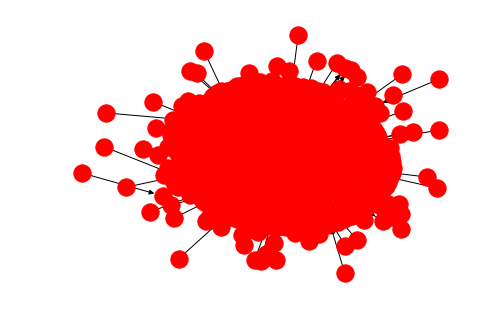

In [23]:
nx.draw(testing)

In [10]:
nx.info(testing)

'Name: \nType: MultiDiGraph\nNumber of nodes: 4076\nNumber of edges: 10000\nAverage in degree:   2.4534\nAverage out degree:   2.4534'

In [29]:
testing = signed(10, 0.1, [1, 1], [1, 1], 2000, 0.2)

In [11]:
import pickle

In [12]:
with open("krapivsky.pkl", "wb") as fp:
    pickle.dump(testing, fp)

In [14]:
signedmodel = signed(4076, 0, [1, 1], [1, 1], 10000, 740/10000)

In [15]:
nx.info(signedmodel)

'Name: \nType: MultiDiGraph\nNumber of nodes: 4076\nNumber of edges: 10000\nAverage in degree:   2.4534\nAverage out degree:   2.4534'

In [18]:
positive = [(u,v) for u,v,e in signedmodel.edges(data=True) if e["weight"] == 1]
negative = [(u,v) for u,v,e in signedmodel.edges(data=True) if e["weight"] == -1]

In [19]:
print(len(positive))
print(len(negative))

9221
779


In [21]:
with open("signed_krapivsky.pkl", "wb") as fp:
    pickle.dump(signedmodel, fp)